In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn import tree
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Data Visualizations

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Train_Lung_Issues.csv')

<Figure size 1080x1440 with 0 Axes>

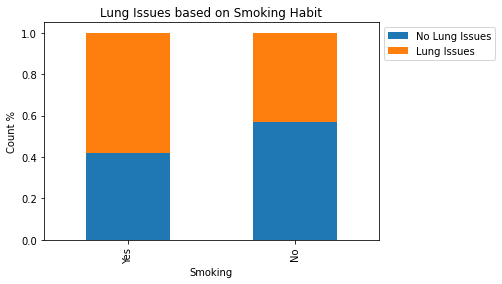

In [ ]:
plt.figure(figsize=(15,20))
df1 = data.groupby(['SMOKE100','lung_issues']).size()
data_to_plot1 = df1.unstack()
data_to_plot1.drop([-1.0,7.0,9.0],axis = 0, inplace=True)
data_to_plot_transpose1 = data_to_plot1.transpose()
data_to_plot_transpose_percent1 = data_to_plot_transpose1.div(data_to_plot_transpose1.sum())
data_to_plot_percent1 = data_to_plot_transpose_percent1.transpose()

data_to_plot_percent1.plot(kind='bar',stacked=True).legend(["No Lung Issues", "Lung Issues"], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
positions = (0, 1)
labels = ("Yes", "No")
plt.xticks(positions, labels)
plt.xlabel('Smoking')
plt.ylabel('Count %')
plt.title("Lung Issues based on Smoking Habit")

plt.show()

<Figure size 1080x1440 with 0 Axes>

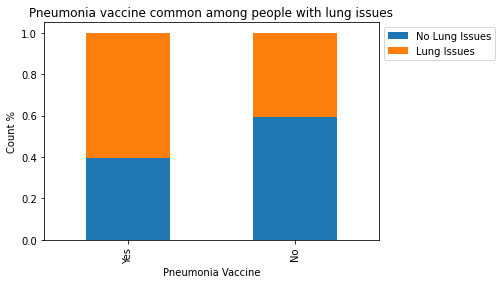

In [ ]:
plt.figure(figsize=(15,20))
df2 = data.groupby(['PNEUVAC3','lung_issues']).size()
data_to_plot2 = df2.unstack()
data_to_plot2.drop([-1.0,7.0,9.0],axis = 0, inplace=True)
data_to_plot_transpose2 = data_to_plot2.transpose()
data_to_plot_transpose_percent2 = data_to_plot_transpose2.div(data_to_plot_transpose2.sum())
data_to_plot_percent2 = data_to_plot_transpose_percent2.transpose()

data_to_plot_percent2.plot(kind='bar',stacked=True).legend(["No Lung Issues", "Lung Issues"], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
positions = (0, 1)
labels = ("Yes", "No")
plt.xticks(positions, labels)
plt.xlabel('Pneumonia Vaccine')
plt.ylabel('Count %')
plt.title("Pneumonia vaccine increase with lung issues")

plt.show()

<Figure size 1080x1440 with 0 Axes>

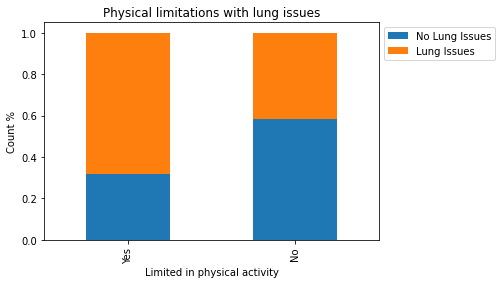

In [ ]:
plt.figure(figsize=(15,20))
df3 = data.groupby(['QLACTLM2','lung_issues']).size()
data_to_plot3 = df3.unstack()
data_to_plot3.drop([-1.0,7.0,9.0],axis = 0, inplace=True)
data_to_plot_transpose3 = data_to_plot3.transpose()
data_to_plot_transpose_percent3 = data_to_plot_transpose3.div(data_to_plot_transpose3.sum())
data_to_plot_percent3 = data_to_plot_transpose_percent3.transpose()

data_to_plot_percent3.plot(kind='bar',stacked=True).legend(["No Lung Issues", "Lung Issues"], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
positions = (0, 1)
labels = ("Yes", "No")
plt.xticks(positions, labels)
plt.xlabel('Limited in physical activity')
plt.ylabel('Count %')
plt.title('Physical limitations with lung issues')

plt.show()

### Model Comparison & Prediction

In [ ]:
# Generate Test and training data set

test_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Test_Lung_Issues.csv')
train_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Train_Lung_Issues.csv')

In [ ]:
test_set.shape

In [ ]:
train_set.shape

In [ ]:
train_target = train_set[['lung_issues']]
test_target = test_set[['lung_issues']]

In [ ]:
train_set.drop(columns=['lung_issues'],inplace=True)
test_set.drop(columns=['lung_issues'],inplace=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_set, train_target, shuffle = True, test_size=0.2, random_state=42)

In [ ]:
def grid_search(model, tree_parameters, score):
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(model, tree_parameters, scoring='%s_macro' % score)
    clf.fit(x_train, y_train)

    print("Best parameters found on development set: ")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

In [ ]:
y_pred = model_lr.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(model_lr.get_params())
print("Accuracy on test data: {:.2f}".format(model_lr.score(x_test, y_test)))
print("Accuracy on training data: {:.2f}".format(model_lr.score(x_train, y_train)))
disp = plot_confusion_matrix(model_lr, train_set, train_target, display_labels=['Without Issues',"With Issues"],cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for the overall dataset')
plt.show()

#### Decision Tree

In [ ]:
model_dt = tree.DecisionTreeClassifier()
tree_parameters = [{'splitter': ['best', 'random'],'max_depth': [15,10,20],'criterion': ['gini', 'entropy']}]
scores = ['f1']

In [ ]:
time_dict={}
start_time = time.time()
grid_search(model_dt, tree_parameters, scores[0])
end_time = time.time()
time_dict[f'DecisionTreeClassifier + gridSearchCV + {scores[0]}'] = end_time - start_time

In [ ]:
model_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 15, splitter = 'best')
# X_train, X_test, y_train, y_test = train_test_split(training_set, training_target,shuffle = True, test_size=0.2, random_state=42)
model_dt.fit(x_train, y_train)

In [ ]:
print(model_dt.get_params())
print("Accuracy on test data: {:.2f}".format(model_dt.score(x_test, y_test)))
print("Accuracy on training data: {:.2f}".format(model_dt.score(x_train, y_train)))
disp = plot_confusion_matrix(model_dt, train_set, train_target, display_labels=['Without Issues',"With Issues"],cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for the overall dataset')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("Detailed classification report:")
print()
y_true, y_pred = y_test, model_dt.predict(x_test)
print(classification_report(y_true, y_pred))
print()

#### Random Forest Algorithm

In [ ]:
# Best parameters set found on development set: {'bootstrap': True, 'max_depth': 10, 'max_features': 18, 'n_estimators': 150}
model_rf = RandomForestClassifier()
tree_parameters = {'bootstrap': [True],'max_depth': [10,15,20],'n_estimators': [100,150]}
scores = ['recall']

In [ ]:
time_dict={}
start_time = time.time()
grid_search(model_rf, tree_parameters, scores[0])
end_time = time.time()
time_dict[f'RandomForestClassifier + gridSearchCV + {scores[0]}'] = end_time - start_time

In [ ]:
model_rf = RandomForestClassifier(bootstrap= True,max_depth= 20, n_estimators= 100)
model_rf.fit(x_train, y_train)

In [ ]:
print(model_rf.get_params())
print("Accuracy on test data: {:.2f}".format(model_rf.score(x_test, y_test)))
print("Accuracy on training data: {:.2f}".format(model_rf.score(x_train, y_train)))
disp = plot_confusion_matrix(model_rf, train_set, train_target, display_labels=['Without Issues',"With Issues"],cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for the overall dataset')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("Detailed classification report:")
print()
y_true, y_pred = y_test, model_rf.predict(x_test)
print(classification_report(y_true, y_pred))
print()

#### XGBoost

In [ ]:
model_xgb = XGBClassifier()
tree_parameters = {'learning_rate': [0.8, 1 , 0.5], 'max_depth': [5,6,10], 'n_estimators': [70,100]}
scores = ['recall']

In [ ]:
time_dict={}
start_time = time.time()
grid_search(model_xgb, tree_parameters, scores[0])
end_time = time.time()
time_dict[f'XGBoost + gridSearchCV + {scores[0]}'] = end_time - start_time

In [ ]:
model_xgb = XGBClassifier(learning_rate= 1,max_depth= 10, n_estimators= 100)
model_xgb.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import classification_report
print("Detailed classification report:")
print()
y_true, y_pred = y_test, model_xgb.predict(x_test)
print(classification_report(y_true, y_pred))
print()

In [ ]:
print(model_xgb.get_params())
print("Accuracy on test data: {:.2f}".format(model_xgb.score(x_test, y_test)))
print("Accuracy on training data: {:.2f}".format(model_xgb.score(x_train, y_train)))
disp = plot_confusion_matrix(model_xgb, train_set, train_target, display_labels=['Without Issues',"With Issues"],cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for the overall dataset')
plt.show()

### Algorithm Comparison & Prediction

In [ ]:
# Generate Test and training data set

test_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Test_Lung_Issues.csv')
train_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Train_Lung_Issues.csv')

In [ ]:
train_target = train_set[['lung_issues']]
test_target = test_set[['lung_issues']]

In [ ]:
train_set.drop(columns=['lung_issues'],inplace=True)
test_set.drop(columns=['lung_issues'],inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_set, train_target, shuffle=True, test_size=0.2, random_state=42)

#### Logistic Regression

In [ ]:
# Parameters for hyperparameter tuning using GridSearchCV - Check what parameters give the best results
parameters_lr = {'max_iter':[100, 150, 200]}

In [ ]:
# Model training - Adjust Hyperparameters
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(class_weight='balanced')
clf_lr = GridSearchCV(model_lr, parameters_lr, scoring='recall')
clf_lr.fit(X_train, y_train)

In [ ]:
clf_lr.best_estimator_

In [ ]:
# Prediction
y_true, y_pred = y_test, clf_lr.predict(X_test)
print(classification_report(y_true, y_pred))

In [ ]:
# Confusion matrix 
print("Accuracy on test data: {:.2f}".format(clf_lr.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(clf_lr.score(X_train, y_train)))
matrix = plot_confusion_matrix(clf_lr, train_set, train_target, display_labels=['No Lung Issues',"Lung Issues"], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

#### Decision Tree

In [ ]:
parameters_dt = {'splitter':['best', 'random'], 'max_depth':[5, 10, 15, 20, 25], 'criterion':['gini', 'entropy']}

In [ ]:
# Model training - Adjust Hyperparameters

model_dt = tree.DecisionTreeClassifier(class_weight='balanced')
clf_dt = GridSearchCV(model_dt, parameters_dt, scoring='recall')
clf_dt.fit(X_train, y_train)

In [ ]:
clf_dt.best_estimator_

In [ ]:
# Prediction
y_true, y_pred = y_test, clf_dt.predict(X_test)
print(classification_report(y_true, y_pred))

In [ ]:
# Confusion matrix 
print("Accuracy on test data: {:.2f}".format(clf_dt.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(clf_dt.score(X_train, y_train)))
matrix = plot_confusion_matrix(clf_dt, train_set, train_target, display_labels=['No Lung Issues',"Lung Issues"], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

#### Random Forest

In [ ]:
# Parameters for hyperparameter tuning using GridSearchCV - Check what parameters give the best results
parameters_rf = {'bootstrap':[True, False], 'max_depth':[5, 10, 15, 20], 'n_estimators':[100, 150, 200]}

In [ ]:
# Model training - Adjust Hyperparameters
model_rf = RandomForestClassifier(class_weight="balanced")
clf_rf = GridSearchCV(model_rf, parameters_rf, scoring='recall')
clf_rf.fit(X_train, y_train)

In [ ]:
clf_rf.best_estimator_

In [ ]:
# Prediction
y_true, y_pred = y_test, clf_rf.predict(X_test)
print(classification_report(y_true, y_pred))

In [ ]:
# Confusion matrix 
print("Accuracy on test data: {:.2f}".format(clf_rf.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(clf_rf.score(X_train, y_train)))
matrix = plot_confusion_matrix(clf_rf, train_set, train_target, display_labels=['No Lung Issues','Lung Issues'], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

#### Naive Bayes

In [ ]:
# This algorithm does not have a hyperparameter for class balancing, so these results are skewed

# Model training 
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

In [ ]:
y_true, y_pred = y_test, model_nb.predict(X_test)
print(classification_report(y_true, y_pred))

In [ ]:
# Confusion matrix 
print("Accuracy on test data: {:.2f}".format(model_nb.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(model_nb.score(X_train, y_train)))
matrix = plot_confusion_matrix(model_nb, train_set, train_target, display_labels=['No Lung Issues','Lung Issues'], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

#### XGBoost

In [ ]:
# Parameters for hyperparameter tuning using GridSearchCV - Check what parameters give the best results
parameters_xgb = {'n_estimators':[150, 200, 250, 300], 'max_depth':[5, 6, 7, 8], 'learning_rate':[0.01, 0.02, 0.03]}

In [ ]:
# Model training - Adjust Hyperparameters
model_xgb = XGBClassifier(use_label_encoder=False, scale_pos_weight=33)
clf_xgb = GridSearchCV(model_xgb, parameters_xgb, scoring='recall')
clf_xgb.fit(X_train, y_train)

In [ ]:
clf_xgb.best_estimator_

In [ ]:
# Prediction
y_true, y_pred = y_test, clf_xgb.predict(X_test)
print(classification_report(y_true, y_pred))

In [ ]:
# Confusion matrix 
print("Accuracy on test data: {:.2f}".format(clf_xgb.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(clf_xgb.score(X_train, y_train)))
matrix = plot_confusion_matrix(clf_xgb, train_set, train_target, display_labels=['No Lung Issues','Lung Issues'], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()